In [5]:
import logging
from operator import itemgetter
from IPython.display import display, SVG
import pandas as pd
from chembl_webresource_client.new_client import new_client
molecule = new_client.molecule
molecule.set_format('json')

In [6]:
#obtain all biotherapeutic molecules with no Rule-of-Five violations
biotherapeutics = molecule.filter(biotherapeutic__isnull=False).filter(molecule_properties__num_ro5_violations=0)

In [7]:
len(biotherapeutics)

1150

In [8]:
biotherapeutics_df = pd.DataFrame(list(biotherapeutics.all()))

In [9]:
biotherapeutics_df

,atc_classifications,availability_type,biotherapeutic,black_box_warning,chebi_par_id,chirality,cross_references,dosed_ingredient,first_approval,first_in_class,...,topical,usan_stem,usan_stem_definition,usan_substem,usan_year,withdrawn_class,withdrawn_country,withdrawn_flag,withdrawn_reason,withdrawn_year
0,[],-1.0,"{'biocomponents': [], 'description': None, 'he...",0,NaN,-1,[],False,NaN,-1,...,False,None,None,None,NaN,None,None,False,None,None
1,[],-1.0,"{'biocomponents': [], 'description': None, 'he...",0,NaN,-1,[],False,NaN,-1,...,False,None,None,None,NaN,None,None,False,None,None
2,[],-1.0,"{'biocomponents': [], 'description': None, 'he...",0,NaN,-1,[],False,NaN,-1,...,False,None,None,None,NaN,None,None,False,None,None
3,[],-1.0,"{'biocomponents': [], 'description': None, 'he...",0,NaN,-1,[],False,NaN,-1,...,False,None,None,None,NaN,None,None,False,None,None
4,[],-1.0,"{'biocomponents': [], 'description': None, 'he...",0,NaN,-1,[],False,NaN,-1,...,False,None,None,None,NaN,None,None,False,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145,[],-1.0,"{'biocomponents': [], 'description': None, 'he...",0,NaN,-1,[],False,NaN,-1,...,False,None,None,None,NaN,None,None,False,None,None
1146,[],-1.0,"{'biocomponents': [], 'description': None, 'he...",0,NaN,-1,[],False,NaN,-1,...,False,None,None,None,NaN,None,None,False,None,None
1147,[],-1.0,"{'biocomponents': [], 'description': None, 'he...",0,NaN,-1,[],False,NaN,-1,...,False,None,None,None,NaN,None,None,False,None,None
1148,[],-1.0,"{'biocomponents': [], 'description': None, 'he...",0,NaN,-1,[],False,NaN,-1,...,False,None,None,None,NaN,None,None,False,None,None


In [10]:
#load the csv file with all A-type assaya with bos taurus as the target
assay_A = pd.read_csv('assay_bos_taurus.csv',sep=';')

In [11]:
assay_A

,ChEMBL ID,Assay Type,Description,Organism,Compounds,Activities,BAO Format ID,BAO Format,Confidence Score,Confidence Label,...,Journal,Volume,First Page,Last Page,Assay Parameters,Assay Classification L1,Assay Classification L2,Assay Classification L3,Variant Sequence Accession,Variant Sequence Mutation
0,CHEMBL3863928,A,Binding affinity to BSA assessed as dissociati...,Bos taurus,1,1,BAO_0000357,single protein format,9,9 - Direct single protein target assigned,...,J Med Chem,59,10788,10793,NaN,NaN,NaN,NaN,NaN,NaN
1,CHEMBL3424919,A,Cytotoxicity against bovine MDBK cells assesse...,Bos taurus,22,23,BAO_0000219,cell-based format,0,0 - Default value - Target unknown or has yet ...,...,Bioorg. Med. Chem. Lett.,25,2401,2404,NaN,NaN,NaN,NaN,NaN,NaN
2,CHEMBL642716,A,Delta Tm value ( Tmdrug-DNA )-TmDNA ) was obta...,Bos taurus,1,1,BAO_0000218,organism-based format,1,1 - Target assigned is non-molecular,...,J. Med. Chem.,43,4711,4720,NaN,NaN,NaN,NaN,NaN,NaN
3,CHEMBL1285656,A,Cytotoxicity against BAEC assessed as cell via...,Bos taurus,2,2,BAO_0000019,assay format,0,0 - Default value - Target unknown or has yet ...,...,Eur. J. Med. Chem.,45,5309,5317,NaN,NaN,NaN,NaN,NaN,NaN
4,CHEMBL4180781,A,Binding affinity to calf thymus duplex DNA ass...,Bos taurus,1,1,BAO_0000225,nucleic acid format,3,3 - Target assigned is molecular non-protein t...,...,Bioorg Med Chem,25,6404,6411,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,CHEMBL623217,A,Association constant of binding of compound wi...,Bos taurus,3,3,BAO_0000218,organism-based format,1,1 - Target assigned is non-molecular,...,J. Med. Chem.,39,1293,1302,NaN,NaN,NaN,NaN,NaN,NaN
603,CHEMBL633370,A,Tested for inhibition of carbonic anhydrase 4 ...,Bos taurus,2,2,BAO_0000218,organism-based format,1,1 - Target assigned is non-molecular,...,J. Med. Chem.,43,4542,4551,NaN,NaN,NaN,NaN,NaN,NaN
604,CHEMBL623555,A,Specificity constant of the bovine serum album...,Bos taurus,1,1,BAO_0000019,assay format,0,0 - Default value - Target unknown or has yet ...,...,Bioorg. Med. Chem. Lett.,8,1113,1116,NaN,NaN,NaN,NaN,NaN,NaN
605,CHEMBL635065,A,Solubility against bovine alpha-chymotrypsin,Bos taurus,1,1,BAO_0000218,organism-based format,1,1 - Target assigned is non-molecular,...,J. Med. Chem.,30,1017,1023,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#obtain all bioactivities for all the molecules in assay_A
bioact = pd.DataFrame()
for chembl_id in assay_A['ChEMBL ID']:
    records = new_client.activity.filter(assay_chembl_id=chembl_id)
    records_df = pd.DataFrame(list(records.all()))
    bioact = bioact.append(records_df)   

In [63]:
bioact.reset_index(drop=True, inplace=True) 

In [71]:
bioact

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,16771318,[],CHEMBL3863928,Binding affinity to BSA assessed as dissociati...,A,None,None,BAO_0000179,BAO_0000357,...,Bos taurus,Serum albumin,9913,None,None,K,/s,None,None,1700.0
1,None,15237924,[],CHEMBL3424919,Cytotoxicity against bovine MDBK cells assesse...,A,None,None,BAO_0000187,BAO_0000219,...,None,ADMET,None,None,None,CC50,uM,UO_0000065,None,100.0
2,None,15237925,[],CHEMBL3424919,Cytotoxicity against bovine MDBK cells assesse...,A,None,None,BAO_0000187,BAO_0000219,...,None,ADMET,None,None,None,CC50,uM,UO_0000065,None,64.0
3,None,15237926,[],CHEMBL3424919,Cytotoxicity against bovine MDBK cells assesse...,A,None,None,BAO_0000187,BAO_0000219,...,None,ADMET,None,None,None,CC50,uM,UO_0000065,None,100.0
4,None,15237927,[],CHEMBL3424919,Cytotoxicity against bovine MDBK cells assesse...,A,None,None,BAO_0000187,BAO_0000219,...,None,ADMET,None,None,None,CC50,uM,UO_0000065,None,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,None,502877,[],CHEMBL633370,Tested for inhibition of carbonic anhydrase 4 ...,A,None,None,BAO_0002135,BAO_0000218,...,Bos taurus,Bos taurus,9913,None,None,Solubility,mM,UO_0000065,None,47.0
3130,None,203575,[],CHEMBL623555,Specificity constant of the bovine serum album...,A,None,None,BAO_0000179,BAO_0000019,...,None,ADMET,None,None,None,(kcat/KM)/kuncat,M-1,None,None,2600000.0
3131,None,455335,[],CHEMBL635065,Solubility against bovine alpha-chymotrypsin,A,None,None,BAO_0002135,BAO_0000218,...,Bos taurus,Bos taurus,9913,None,None,Solubility,uM,UO_0000065,None,10.0
3132,None,474723,[],CHEMBL634760,Michaelis constant for hydrolysis catalyzed by...,A,None,None,BAO_0000179,BAO_0000218,...,Bos taurus,Bos taurus,9913,None,None,Vmax / Km,None,None,None,1.06E-8


In [74]:
# form a temperary dataframe "ml_bioact" without repetitive molecules
# count the number of bioactivities for each molecule
seen = {}
ml_bioact = pd.DataFrame()
for index, row in bioact.iterrows():
    molecule_chembl_id = row['molecule_chembl_id']
    if molecule_chembl_id not in seen:
        seen[molecule_chembl_id] = 1
        ml_bioact = ml_bioact.append(row)
    else:
        seen[molecule_chembl_id] += 1
        print(molecule_chembl_id, seen[molecule_chembl_id])


CHEMBL2057884 2
CHEMBL4548775 2
CHEMBL4444942 2
CHEMBL435087 2
CHEMBL1643 2
CHEMBL418899 2
CHEMBL418899 3
CHEMBL1643 3
CHEMBL435087 3
CHEMBL564201 2
CHEMBL1093906 2
CHEMBL866 2
CHEMBL1643 4
CHEMBL184 2
CHEMBL564201 3
CHEMBL418899 4
CHEMBL1914709 2
CHEMBL4464312 2
CHEMBL1914709 3
CHEMBL1233636 2
CHEMBL418899 5
CHEMBL1940452 2
CHEMBL184 3
CHEMBL866 3
CHEMBL418899 6
CHEMBL98778 2
CHEMBL564201 4
CHEMBL1643 5
CHEMBL1996518 2
CHEMBL495806 2
CHEMBL4164983 2
CHEMBL4169485 2
CHEMBL4161565 2
CHEMBL4161158 2
CHEMBL4174325 2
CHEMBL1914709 4
CHEMBL418899 7
CHEMBL2368591 2
CHEMBL2204494 2
CHEMBL493287 2
CHEMBL447878 2
CHEMBL4175069 2
CHEMBL4163914 2
CHEMBL2368591 3
CHEMBL3288759 2
CHEMBL13556 2
CHEMBL13556 3
CHEMBL3392174 2
CHEMBL478007 2
CHEMBL106 2
CHEMBL418899 8
CHEMBL4250329 2
CHEMBL4250329 3
CHEMBL418899 9
CHEMBL564201 5
CHEMBL4244247 2
CHEMBL151997 2
CHEMBL109904 2
CHEMBL4175069 3
CHEMBL4163914 3
CHEMBL2393130 2
CHEMBL4161990 2
CHEMBL1996518 3
CHEMBL4435230 2
CHEMBL4175069 4
CHEMBL4163914 4
CH

CHEMBL583102 3
CHEMBL1079328 2
CHEMBL83 8
CHEMBL1914709 24
CHEMBL83 9
CHEMBL2137046 7
CHEMBL1093458 7
CHEMBL1944696 2
CHEMBL1914709 25
CHEMBL1914709 26
CHEMBL1696 2
CHEMBL1200710 2
CHEMBL503189 2
CHEMBL1149 2
CHEMBL1914709 27
CHEMBL1914709 28
CHEMBL435087 13
CHEMBL567663 2
CHEMBL3310476 6
CHEMBL3311247 6
CHEMBL2368591 10
CHEMBL38 9
CHEMBL4442404 5
CHEMBL4462948 5
CHEMBL4575685 5
CHEMBL4577786 5
CHEMBL4546768 5
CHEMBL4563639 5
CHEMBL4469837 5
CHEMBL4435230 6
CHEMBL4591026 5
CHEMBL4436849 5
CHEMBL4537411 5
CHEMBL4549123 5
CHEMBL106 11
CHEMBL3798791 3
CHEMBL3798682 3
CHEMBL3798553 3
CHEMBL3797217 3
CHEMBL3798315 3
CHEMBL3798984 3
CHEMBL3799096 3
CHEMBL3800342 3
CHEMBL3799778 3
CHEMBL3798391 3
CHEMBL3799224 3
CHEMBL3800139 3
CHEMBL4299616 3
CHEMBL4299597 3
CHEMBL4299595 3
CHEMBL4069438 2
CHEMBL106 12
CHEMBL139 5
CHEMBL161 2
CHEMBL1359 2
CHEMBL2204494 8
CHEMBL4464312 6
CHEMBL83 10
CHEMBL2137046 8
CHEMBL1093458 8
CHEMBL435087 14
CHEMBL3247440 4
CHEMBL193952 2
CHEMBL1349 2
CHEMBL4244247 5
CHE

In [128]:
# for assay A, there are 2269 molecules 
len(ml_bioact)

2269

In [117]:
# obtain information for each molecule in ml_bioact based on their chembl_ids and 
mol_info = pd.DataFrame()
for i in range(0, len(ml_bioact), 100):
    for molecule_chembl_id in ml_bioact[i:i+100]['molecule_chembl_id']:
        mol = molecule.get(molecule_chembl_id)
        mol_df = pd.DataFrame(list(mol.items())).transpose()
        mol_df = mol_df.rename(columns=mol_df.iloc[0]).drop(mol_df.index[0])
        mol_info = mol_info.append(mol_df)
mol_info.reset_index(drop=True, inplace=True) 

In [118]:
mol_info

,atc_classifications,availability_type,biotherapeutic,black_box_warning,chebi_par_id,chirality,cross_references,dosed_ingredient,first_approval,first_in_class,...,topical,usan_stem,usan_stem_definition,usan_substem,usan_year,withdrawn_class,withdrawn_country,withdrawn_flag,withdrawn_reason,withdrawn_year
0,[],-1,None,0,43355,-1,[],False,None,-1,...,False,None,None,None,None,None,None,False,None,None
1,[],-1,None,0,None,-1,[],False,None,-1,...,False,None,None,None,None,None,None,False,None,None
2,[],-1,None,0,None,-1,[],False,None,-1,...,False,None,None,None,None,None,None,False,None,None
3,[],-1,None,0,None,-1,[],False,None,-1,...,False,None,None,None,None,None,None,False,None,None
4,[],-1,None,0,None,-1,[],False,None,-1,...,False,None,None,None,None,None,None,False,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2264,[],-1,None,0,None,-1,[],False,None,-1,...,False,None,None,None,None,None,None,False,None,None
2265,[],-1,None,0,None,-1,[],False,None,-1,...,False,None,None,None,None,None,None,False,None,None
2266,"[D05AD02, D05BA02]",1,None,1,18358,2,"[{'xref_id': 'methoxsalen', 'xref_name': 'meth...",True,1954,0,...,True,-sal-,anti-inflammatory agents (salicylic acid deriv...,-sal-,None,None,None,False,None,None
2267,[],-1,None,0,None,-1,[],False,None,-1,...,False,None,None,None,None,None,None,False,None,None


In [127]:
def find_bioactivity_for_single_molecule(molecule_chembl_id):
    bioact_for_single_molecule = []
    for ml_id, row_i in bioact.iterrows():
        smile_bioact = {}
        if row_i['molecule_chembl_id'] == molecule_chembl_id:
            smile_bioact['molecule_chembl_id'] = row_i['molecule_chembl_id']
            smile_bioact['type'] = row_i['type']
            smile_bioact['value'] = row_i['value']
            smile_bioact['units'] = row_i['units']
            for index, row_j in mol_info.iterrows():
                if row_j['molecule_chembl_id'] == molecule_chembl_id:
                    smile_bioact['canonical_smiles'] = row_j['molecule_structures']['canonical_smiles']
            bioact_for_single_molecule.append(smile_bioact)
    return bioact_for_single_molecule

In [124]:
molecule_chembl_id = 'CHEMBL71'

bioact_for_single_molecule = []
for ml_id, row_i in bioact.iterrows():
    smile_bioact = {}
    if row_i['molecule_chembl_id'] == molecule_chembl_id:
        smile_bioact['molecule_chembl_id'] = row_i['molecule_chembl_id']
        smile_bioact['type'] = row_i['type']
        smile_bioact['value'] = row_i['value']
        smile_bioact['units'] = row_i['units']
        for index, row_j in mol_info.iterrows():
            if row_j['molecule_chembl_id'] == molecule_chembl_id:
                smile_bioact['canonical_smiles'] = row_j['molecule_structures']['canonical_smiles']
        bioact_for_single_molecule.append(smile_bioact)

In [125]:
bioact_for_single_molecule

[{'molecule_chembl_id': 'CHEMBL71',
  'type': 'Activity',
  'value': None,
  'units': None,
  'canonical_smiles': 'CN(C)CCCN1c2ccccc2Sc2ccc(Cl)cc21'},
 {'molecule_chembl_id': 'CHEMBL71',
  'type': 'logKd',
  'value': '4.98',
  'units': None,
  'canonical_smiles': 'CN(C)CCCN1c2ccccc2Sc2ccc(Cl)cc21'},
 {'molecule_chembl_id': 'CHEMBL71',
  'type': 'log K',
  'value': '3.79',
  'units': None,
  'canonical_smiles': 'CN(C)CCCN1c2ccccc2Sc2ccc(Cl)cc21'},
 {'molecule_chembl_id': 'CHEMBL71',
  'type': 'log K',
  'value': '4.32',
  'units': None,
  'canonical_smiles': 'CN(C)CCCN1c2ccccc2Sc2ccc(Cl)cc21'}]

In [ ]:
def obtain_molecule_image(molecule_chembl_id):
    molecule_chembl_id = 'CHEMBL71'
    image = new_client.image
    image.set_format('svg')
    svg = image.get(molecule_chembl_id)
    SVG(svg)

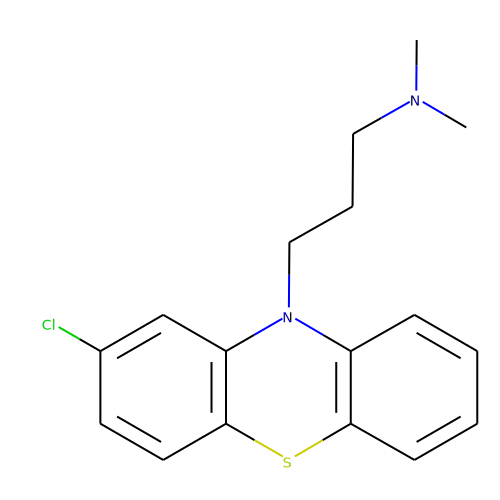

In [126]:
molecule_chembl_id = 'CHEMBL71'
image = new_client.image
image.set_format('svg')
svg = image.get(molecule_chembl_id)
SVG(svg)